In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [73]:
# set some default
pd.set_option('display.float_format', str)
sns.set_palette('bright')

In [4]:
df = pd.read_pickle('data_Han/Han_df_cleaned')

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,2,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,2170,400,1951,1991.0,98125,47.721,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,2,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,4,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,2,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.view.value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int8   
 8   condition      21597 non-null  int8   
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## list of things to explore

***LOCATION***
 * zipcode - area
 * waterfront/view important
 * neiborhood amenities
 * is height important?/flood
 
***LIVING SPACE*** 
 * bigger house sells more?
 * more bedrooms/bathrooms sells more?
 * more floors sells more?
 * space allocations
 * Floor Area Ratio sells more?
 
***HOUSE CONDITION***
* year built & renovated
* Age & condition

***NEIGHBORHOOD***
* amenities, parks, hospitals, etc...
* safety
 
***INVESTMENT***
 * year built
 * view/waterfront
 * flood zone/latitude
 
 
***OVERALL INTUITION***
 * sqrt_living
 * bedrooms/bathrooms
 * view/waterfront
 * zipcode
 * year_built

# EDA LOCATION

In [30]:
col_selector = ['price','zipcode','sqft_living']
df_loc = df[col_selector]
df_loc.head()

,price,zipcode,sqft_living
0,221900.0,98178,1180
1,538000.0,98125,2570
2,180000.0,98028,770
3,604000.0,98136,1960
4,510000.0,98074,1680


In [31]:
df_loc = pd.get_dummies(df_loc,columns=['zipcode'],drop_first=True)
df_loc.head(3)

,price,sqft_living,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,1180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,2570,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,770,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# check in model with zipcode
y = df_loc['price']
X = df_loc.drop(columns=['price'])

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print('R2 with zipcode: ', results.rsquared)

# pretty good R-squared

R2 with zipcode:  0.729951663939566


In [33]:
# add waterfront, view to test
df_loc = df_loc.join(df[['waterfront','view']],on=df_loc.index)

In [34]:
# check in model with zipcode
y = df_loc['price']
X = df_loc.drop(columns=['price'])

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print('R2 with zipcode, waterfront, view: ', results.rsquared)

# pretty good R-squared

R2 with zipcode, waterfront, view:  0.7816789275165473


In [42]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1070.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:52:31   Log-Likelihood:            -2.9096e+05
No. Observations:               21597   AIC:                         5.821e+05
Df Residuals:                   21524   BIC:                         5.826e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.573e+05   9468.640    -16.608

In [46]:
df_loc = df_loc.join(df[['zipcode']],on=df_loc.index)

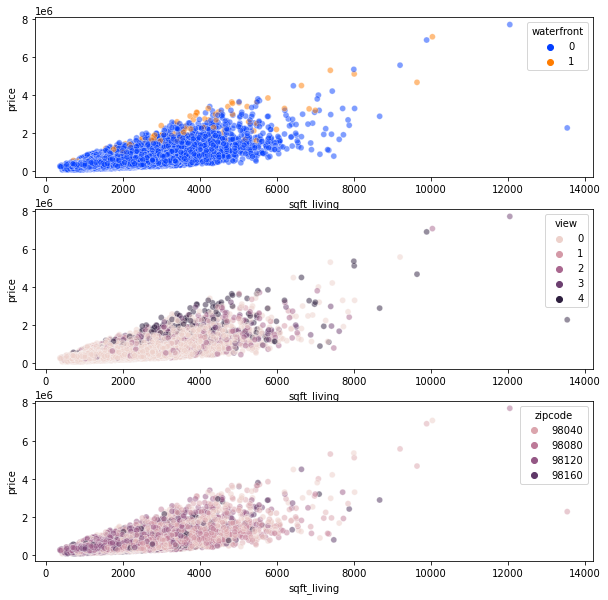

In [75]:
fig,axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
sns.scatterplot(hue = 'waterfront', y = 'price', x = 'sqft_living', data = df_loc, palette='bright', alpha=0.5, ax=axes[0])
sns.scatterplot(hue = 'view', y = 'price', x = 'sqft_living', data = df_loc,alpha=0.5, ax=axes[1])
sns.scatterplot(hue = 'zipcode', y = 'price', x = 'sqft_living', data = df_loc,alpha=0.5, ax=axes[2]);

# group the zipcode to make a better plot
# group by pval? density in one location/zipcode?

# EDA LIVING SPACE

In [43]:
col_selector = ['price','bedrooms','bathrooms','floors','sqft_living','sqft_lot','sqft_above','sqft_basement']
df_ls = df[col_selector]

In [44]:
df_ls.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [45]:
# check in model with
# bedroom, bathroom, floor
y = df_ls['price']
X = df_ls[['bedrooms', 'bathrooms', 'floors']]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

# keep bedroom, bathroom
# drop floor

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2780.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:54:13   Log-Likelihood:            -3.0386e+05
No. Observations:               21597   AIC:                         6.077e+05
Df Residuals:                   21593   BIC:                         6.078e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.316e+04   9356.298     -3.544      0.0

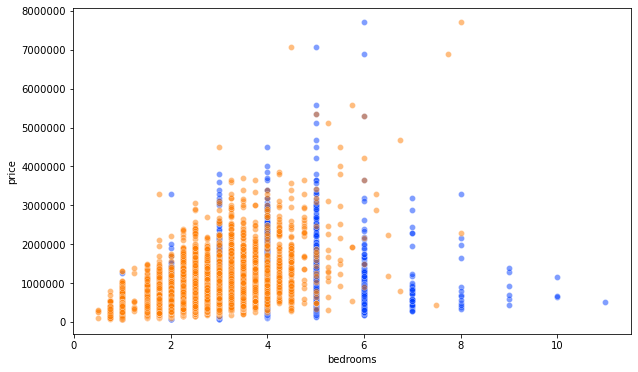

In [76]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'bedrooms', y = 'price', data = df_ls,alpha=0.5)
sns.scatterplot(x = 'bathrooms', y = 'price', data = df_ls,alpha=0.5)
ax.ticklabel_format(style='plain');

In [92]:
df_ls['BR/BTH'] = df_ls['bedrooms']/df_ls['bathrooms']

<ipython-input-92-9e6e56325113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['BR/BTH'] = df_ls['bedrooms']/df_ls['bathrooms']


In [255]:
df_ls['BR/BTH'] = df_ls['BR/BTH'].map(lambda x: round(x,2))

<ipython-input-255-7dacc462b0ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['BR/BTH'] = df_ls['BR/BTH'].map(lambda x: round(x,2))


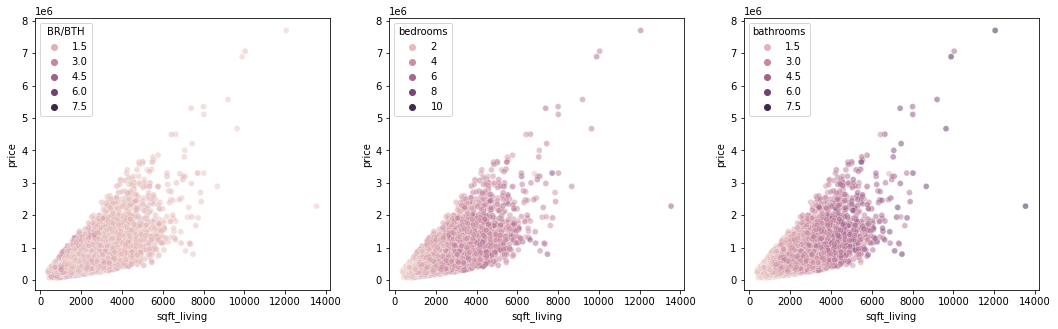

In [256]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
sns.scatterplot(hue = 'BR/BTH', y = 'price', x = 'sqft_living', data = df_ls,alpha=0.5, ax=axes[0])
sns.scatterplot(hue = 'bedrooms', y = 'price', x = 'sqft_living', data = df_ls,alpha=0.5, ax=axes[1])
sns.scatterplot(hue = 'bathrooms', y = 'price', x = 'sqft_living', data = df_ls,alpha=0.5, ax=axes[2])
ax.ticklabel_format(style='plain');

In [257]:
df_ls.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,BR/BTH,FAR,yard,Living_Space_VS_Bedroom
0,221900.0,3,1.0,1180,5650,1.0,1180,0,3.0,0.2088495575221239,4470.0,393.3333333333333
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1.33,0.3548743441038387,6157.0,723.3333333333334
2,180000.0,2,1.0,770,10000,1.0,770,0,2.0,0.077,9230.0,385.0
3,604000.0,4,3.0,1960,5000,1.0,1050,910,1.33,0.392,3950.0,262.5
4,510000.0,3,2.0,1680,8080,1.0,1680,0,1.5,0.2079207920792079,6400.0,560.0


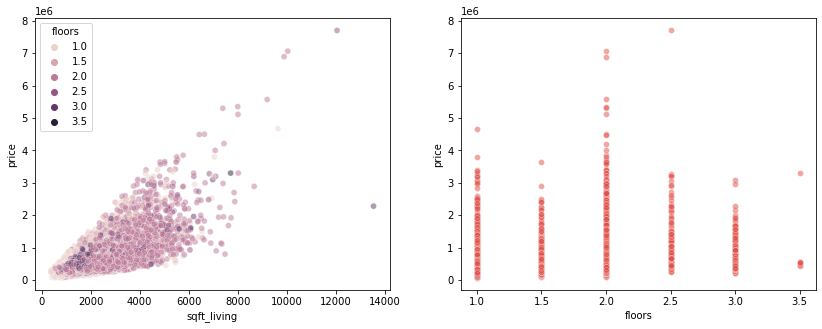

In [95]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.scatterplot(hue = 'floors', y = 'price', x = 'sqft_living', data = df_ls,alpha=0.5, ax=axes[0])
sns.scatterplot(x = 'floors', y = 'price', data = df_ls,alpha=0.5, ax=axes[1])
ax.ticklabel_format(style='plain');

In [96]:
df_ls.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

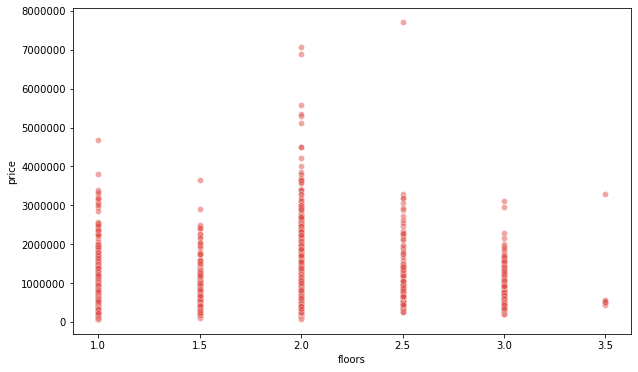

In [97]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'floors', y = 'price', data = df_ls,alpha=0.5)
ax.ticklabel_format(style='plain');

Create new columns by combining

In [98]:
# FAR: Floor Area Ratio
df_ls['FAR'] = df_ls['sqft_living'] / df_ls['sqft_lot']

<ipython-input-98-321bbf913690>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['FAR'] = df_ls['sqft_living'] / df_ls['sqft_lot']


In [258]:
df_ls['FAR'] = df_ls['FAR'].map(lambda x: round(x,2))

<ipython-input-258-d1f51e4184e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['FAR'] = df_ls['FAR'].map(lambda x: round(x,2))


In [99]:
# attempt to calculate the yard
# suppose first floor area = (living-basement) / floors
# yard will be: lot - first floor

df_ls['yard'] = df_ls['sqft_lot'] - ((df_ls['sqft_living'] - df_ls['sqft_basement']) / df_ls['floors'])

<ipython-input-99-6c3a2c5936ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['yard'] = df_ls['sqft_lot'] - ((df_ls['sqft_living'] - df_ls['sqft_basement']) / df_ls['floors'])


In [259]:
df_ls

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,BR/BTH,FAR,yard,Living_Space_VS_Bedroom
0,221900.0,3,1.0,1180,5650,1.0,1180,0,3.0,0.21,4470.0,393.3333333333333
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1.33,0.35,6157.0,723.3333333333334
2,180000.0,2,1.0,770,10000,1.0,770,0,2.0,0.08,9230.0,385.0
3,604000.0,4,3.0,1960,5000,1.0,1050,910,1.33,0.39,3950.0,262.5
4,510000.0,3,2.0,1680,8080,1.0,1680,0,1.5,0.21,6400.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.5,1530,1131,3.0,1530,0,1.2,1.35,621.0,510.0
21593,400000.0,4,2.5,2310,5813,2.0,2310,0,1.6,0.4,4658.0,577.5
21594,402101.0,2,0.75,1020,1350,2.0,1020,0,2.67,0.76,840.0,510.0
21595,400000.0,3,2.5,1600,2388,2.0,1600,0,1.2,0.67,1588.0,533.3333333333334


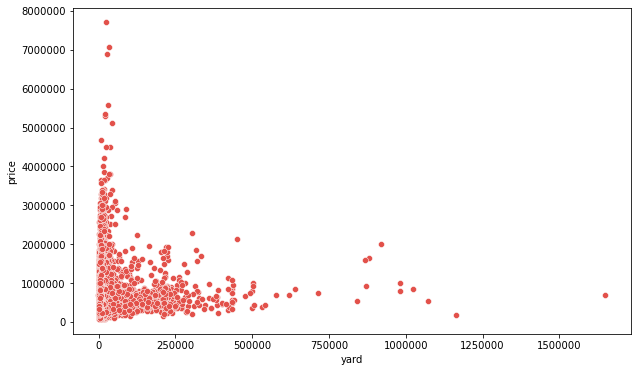

In [101]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'yard', y = 'price', data = df_ls)
ax.ticklabel_format(style='plain');

In [102]:
# Living space / bedrooms
# higher means you have more space for other rooms
# such as kitchen, living room, game room, home gym
df_ls['Living_Space_VS_Bedroom'] = (df_ls['sqft_living'] - df_ls['sqft_basement'])/df_ls['bedrooms']

<ipython-input-102-17e96cc7dcf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['Living_Space_VS_Bedroom'] = (df_ls['sqft_living'] - df_ls['sqft_basement'])/df_ls['bedrooms']


In [261]:
df_ls['Living_Space_VS_Bedroom'] = df_ls['Living_Space_VS_Bedroom'].map(lambda x: round(x,2))

<ipython-input-261-62c0d1160d42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['Living_Space_VS_Bedroom'] = df_ls['Living_Space_VS_Bedroom'].map(lambda x: round(x,2))


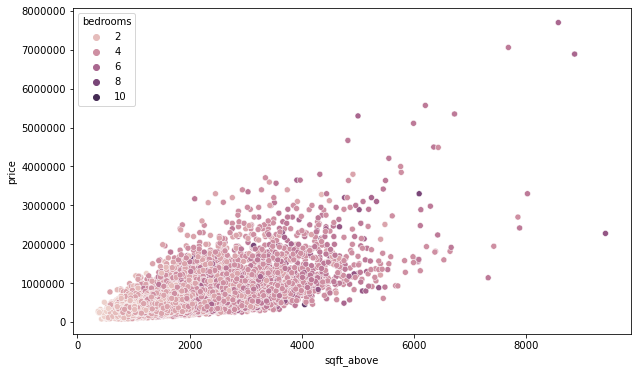

In [106]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'sqft_above', y = 'price', hue = 'bedrooms', data = df_ls)
ax.ticklabel_format(style='plain');

In [262]:
df_ls

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,BR/BTH,FAR,yard,Living_Space_VS_Bedroom
0,221900.0,3,1.0,1180,5650,1.0,1180,0,3.0,0.21,4470.0,393.33
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1.33,0.35,6157.0,723.33
2,180000.0,2,1.0,770,10000,1.0,770,0,2.0,0.08,9230.0,385.0
3,604000.0,4,3.0,1960,5000,1.0,1050,910,1.33,0.39,3950.0,262.5
4,510000.0,3,2.0,1680,8080,1.0,1680,0,1.5,0.21,6400.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.5,1530,1131,3.0,1530,0,1.2,1.35,621.0,510.0
21593,400000.0,4,2.5,2310,5813,2.0,2310,0,1.6,0.4,4658.0,577.5
21594,402101.0,2,0.75,1020,1350,2.0,1020,0,2.67,0.76,840.0,510.0
21595,400000.0,3,2.5,1600,2388,2.0,1600,0,1.2,0.67,1588.0,533.33


In [263]:
df_ls['lot_per_floor'] = df_ls['sqft_lot'] / df_ls['floors']
df_ls['lot_per_floor'] = df_ls['lot_per_floor'].map(lambda x: round(x,2))

<ipython-input-263-b62fb3adf33b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['lot_per_floor'] = df_ls['sqft_lot'] / df_ls['floors']
<ipython-input-263-b62fb3adf33b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['lot_per_floor'] = df_ls['lot_per_floor'].map(lambda x: round(x,2))


In [265]:
df_ls['living_per_floor'] = df_ls['sqft_above'] / df_ls['floors']
df_ls['living_per_floor'] = df_ls['living_per_floor'].map(lambda x: round(x,2))

<ipython-input-265-eb7c54e3fdd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['living_per_floor'] = df_ls['sqft_above'] / df_ls['floors']
<ipython-input-265-eb7c54e3fdd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['living_per_floor'] = df_ls['living_per_floor'].map(lambda x: round(x,2))


In [266]:
df_ls['living_per_lot'] = df_ls['sqft_above'] / df_ls['sqft_lot']
df_ls['living_per_lot'] = df_ls['living_per_lot'].map(lambda x: round(x,2))

<ipython-input-266-62735b98add0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['living_per_lot'] = df_ls['sqft_above'] / df_ls['sqft_lot']
<ipython-input-266-62735b98add0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['living_per_lot'] = df_ls['living_per_lot'].map(lambda x: round(x,2))


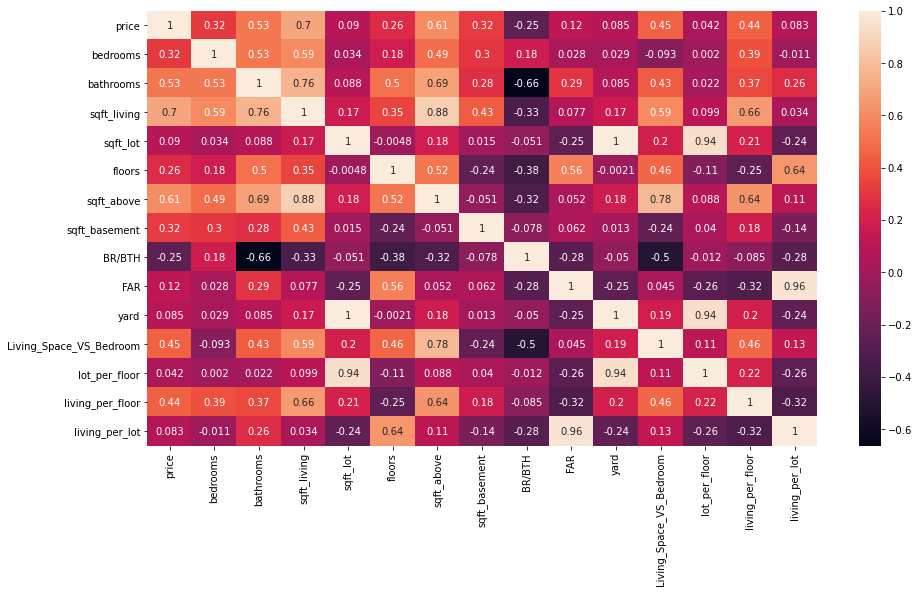

In [268]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_ls.corr(),annot=True);

## (test only) living space simple baseline model

In [34]:
col_selector = ['sqft_living','bedrooms','Living_Space_VS_Bedroom','sqft_lot', 'floors']
X_ls = df_ls[col_selector]
y = df_ls.price

In [35]:
X_ls_stand = X_ls.apply(lambda x: (x-x.mean()/x.std()))
y_stand = (y-y.mean())/y.std()

In [36]:
ls_simple_model = sm.OLS(y_stand,sm.add_constant(X_ls_stand)).fit()

In [38]:
print(ls_simple_model.summary()) # the team decided to use another baseline

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4562.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:41:27   Log-Likelihood:                -22858.
No. Observations:               21597   AIC:                         4.573e+04
Df Residuals:                   21591   BIC:                         4.578e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## EDA HOUSE CONDITION

In [39]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [40]:
col_selector = ['price','grade','condition','yr_built', 'yr_renovated','sqft_living']
df_condition = df[col_selector]
df_condition.head()

,price,grade,condition,yr_built,yr_renovated,sqft_living
0,221900.0,7,2,1955,0.0,1180
1,538000.0,7,2,1951,1991.0,2570
2,180000.0,6,2,1933,0.0,770
3,604000.0,7,4,1965,0.0,1960
4,510000.0,8,2,1987,0.0,1680


<AxesSubplot:xlabel='condition', ylabel='price'>

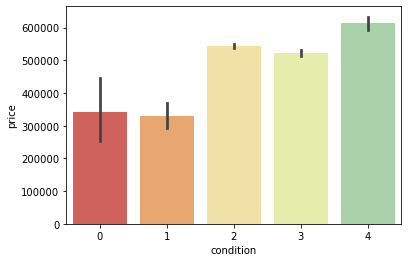

In [41]:
sns.barplot(x = 'condition', y = 'price', data = df_condition)

<AxesSubplot:xlabel='grade', ylabel='price'>

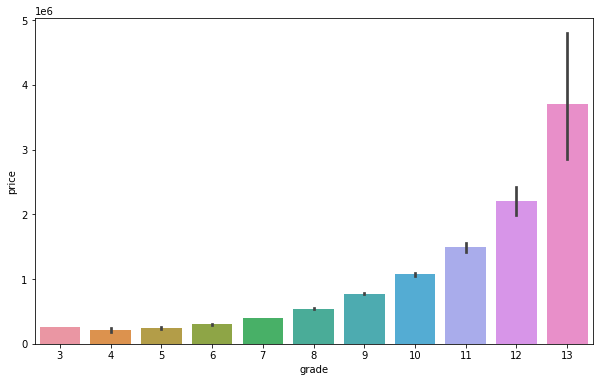

In [54]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = 'grade', y = 'price', data = df_condition,ax=ax)

In [55]:
df_condition["log_grade"] = df["grade"].apply(lambda x: np.log(x))

<ipython-input-55-29115db5be00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition["log_grade"] = df["grade"].apply(lambda x: np.log(x))


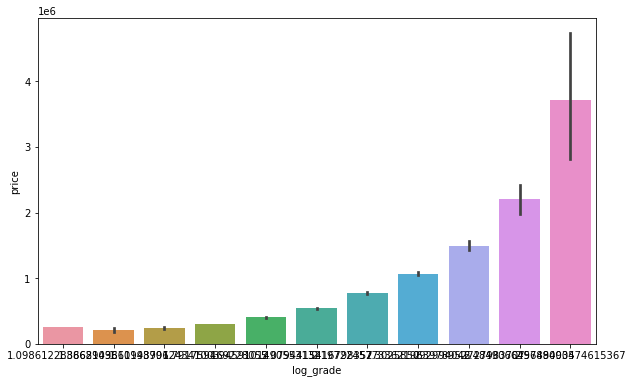

In [56]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = 'log_grade', y = 'price', data = df_condition);

In [57]:
df_condition.yr_built.value_counts().sort_index()

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

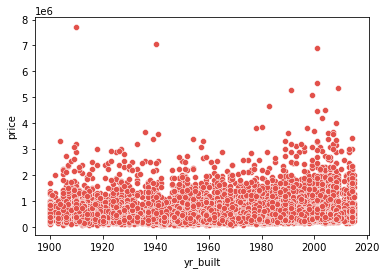

In [58]:
sns.scatterplot(x = 'yr_built', y = 'price', data = df_condition);
# can't tell much

In [59]:
bins = np.arange(1900,2030,10)
labels = np.arange(1,13,1)
df_condition['yr_built_pd'] = pd.cut(df_condition.yr_built, bins = bins, labels = labels,
       include_lowest=True)

<ipython-input-59-570a6d7b7d46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['yr_built_pd'] = pd.cut(df_condition.yr_built, bins = bins, labels = labels,


<AxesSubplot:xlabel='yr_built_pd', ylabel='price'>

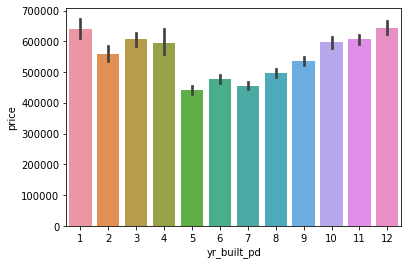

In [60]:
sns.barplot(x = 'yr_built_pd', y = 'price', data = df_condition)
# older house are more expensive
# maybe old house + renovated more expensive?

In [61]:
df_condition['renovated']= df_condition['yr_renovated'].apply(lambda x: 0 if x == 0.0 else 1)
# 1 means renovated, 0 means no
# assume renovated year doesn't matter

<ipython-input-61-8d08a4d84c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['renovated']= df_condition['yr_renovated'].apply(lambda x: 0 if x == 0.0 else 1)


In [62]:
df_condition.renovated

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovated, Length: 21597, dtype: int64

<AxesSubplot:xlabel='renovated', ylabel='price'>

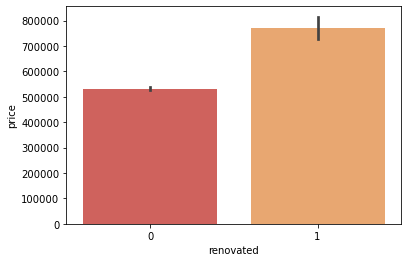

In [63]:
sns.barplot(x = 'renovated', y = 'price', data = df_condition)

how about range the yr renovated?

In [64]:
df.yr_renovated.value_counts().sort_index()

0.0       20853
1934.0        1
1940.0        2
1944.0        1
1945.0        3
          ...  
2011.0        9
2012.0        8
2013.0       31
2014.0       73
2015.0       14
Name: yr_renovated, Length: 70, dtype: int64

In [65]:
bins = [0, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = np.arange(1,11,1)
df_condition['yr_renovated_pd'] = pd.cut(df_condition.yr_renovated, bins = bins, labels = labels,
       include_lowest=True)

<ipython-input-65-8abea5cc995b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['yr_renovated_pd'] = pd.cut(df_condition.yr_renovated, bins = bins, labels = labels,


<AxesSubplot:xlabel='yr_renovated_pd', ylabel='price'>

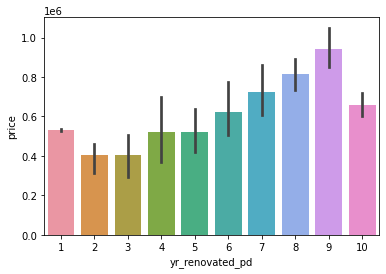

In [66]:
sns.barplot(x = 'yr_renovated_pd', y = 'price', data = df_condition)

how about yr_built + renovated?

In [67]:
bins = [0, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = np.arange(10,0,-1)
df_condition['renovated_recently_pd'] = pd.cut(df_condition.yr_renovated, bins = bins, labels = labels,
       include_lowest=True)

<ipython-input-67-a3930a818d23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['renovated_recently_pd'] = pd.cut(df_condition.yr_renovated, bins = bins, labels = labels,


In [68]:
df_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price                  21597 non-null  float64 
 1   grade                  21597 non-null  int32   
 2   condition              21597 non-null  int8    
 3   yr_built               21597 non-null  int64   
 4   yr_renovated           21597 non-null  float64 
 5   sqft_living            21597 non-null  int64   
 6   log_grade              21597 non-null  float64 
 7   yr_built_pd            21597 non-null  category
 8   renovated              21597 non-null  int64   
 9   yr_renovated_pd        21597 non-null  category
 10  renovated_recently_pd  21597 non-null  category
dtypes: category(3), float64(3), int32(1), int64(3), int8(1)
memory usage: 1.2 MB


In [69]:
df_condition['yr_built_pd'] = df_condition['yr_built_pd'].astype(int)
df_condition['yr_renovated_pd'] = df_condition['yr_renovated_pd'].astype(int)
df_condition['renovated_recently_pd'] = df_condition['renovated_recently_pd'].astype(int)

<ipython-input-69-e3726f857272>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['yr_built_pd'] = df_condition['yr_built_pd'].astype(int)
<ipython-input-69-e3726f857272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['yr_renovated_pd'] = df_condition['yr_renovated_pd'].astype(int)
<ipython-input-69-e3726f857272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [70]:
df_condition['built_and_renovated'] = df_condition['yr_built_pd'] * df_condition['renovated_recently_pd']

<ipython-input-70-530e2a0d016b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condition['built_and_renovated'] = df_condition['yr_built_pd'] * df_condition['renovated_recently_pd']


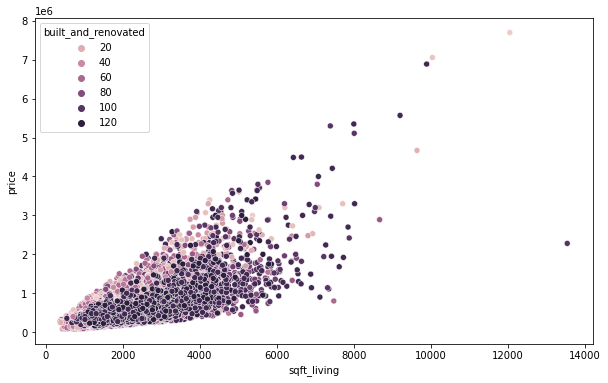

In [71]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'sqft_living', y = 'price', hue = 'built_and_renovated', data = df_condition,ax=ax);

<AxesSubplot:>

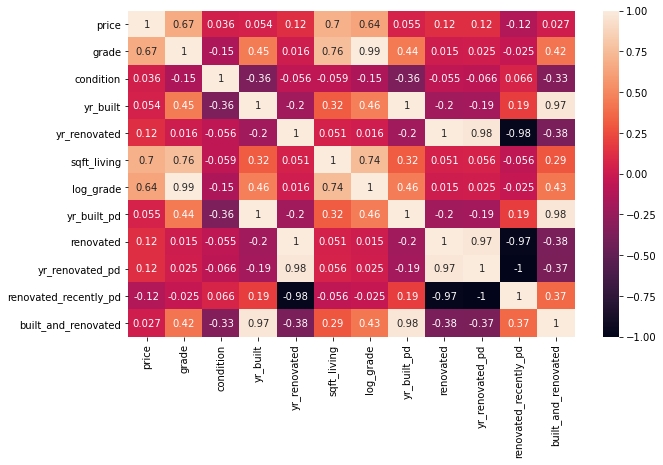

In [72]:
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_condition.corr(),annot=True,ax=ax);

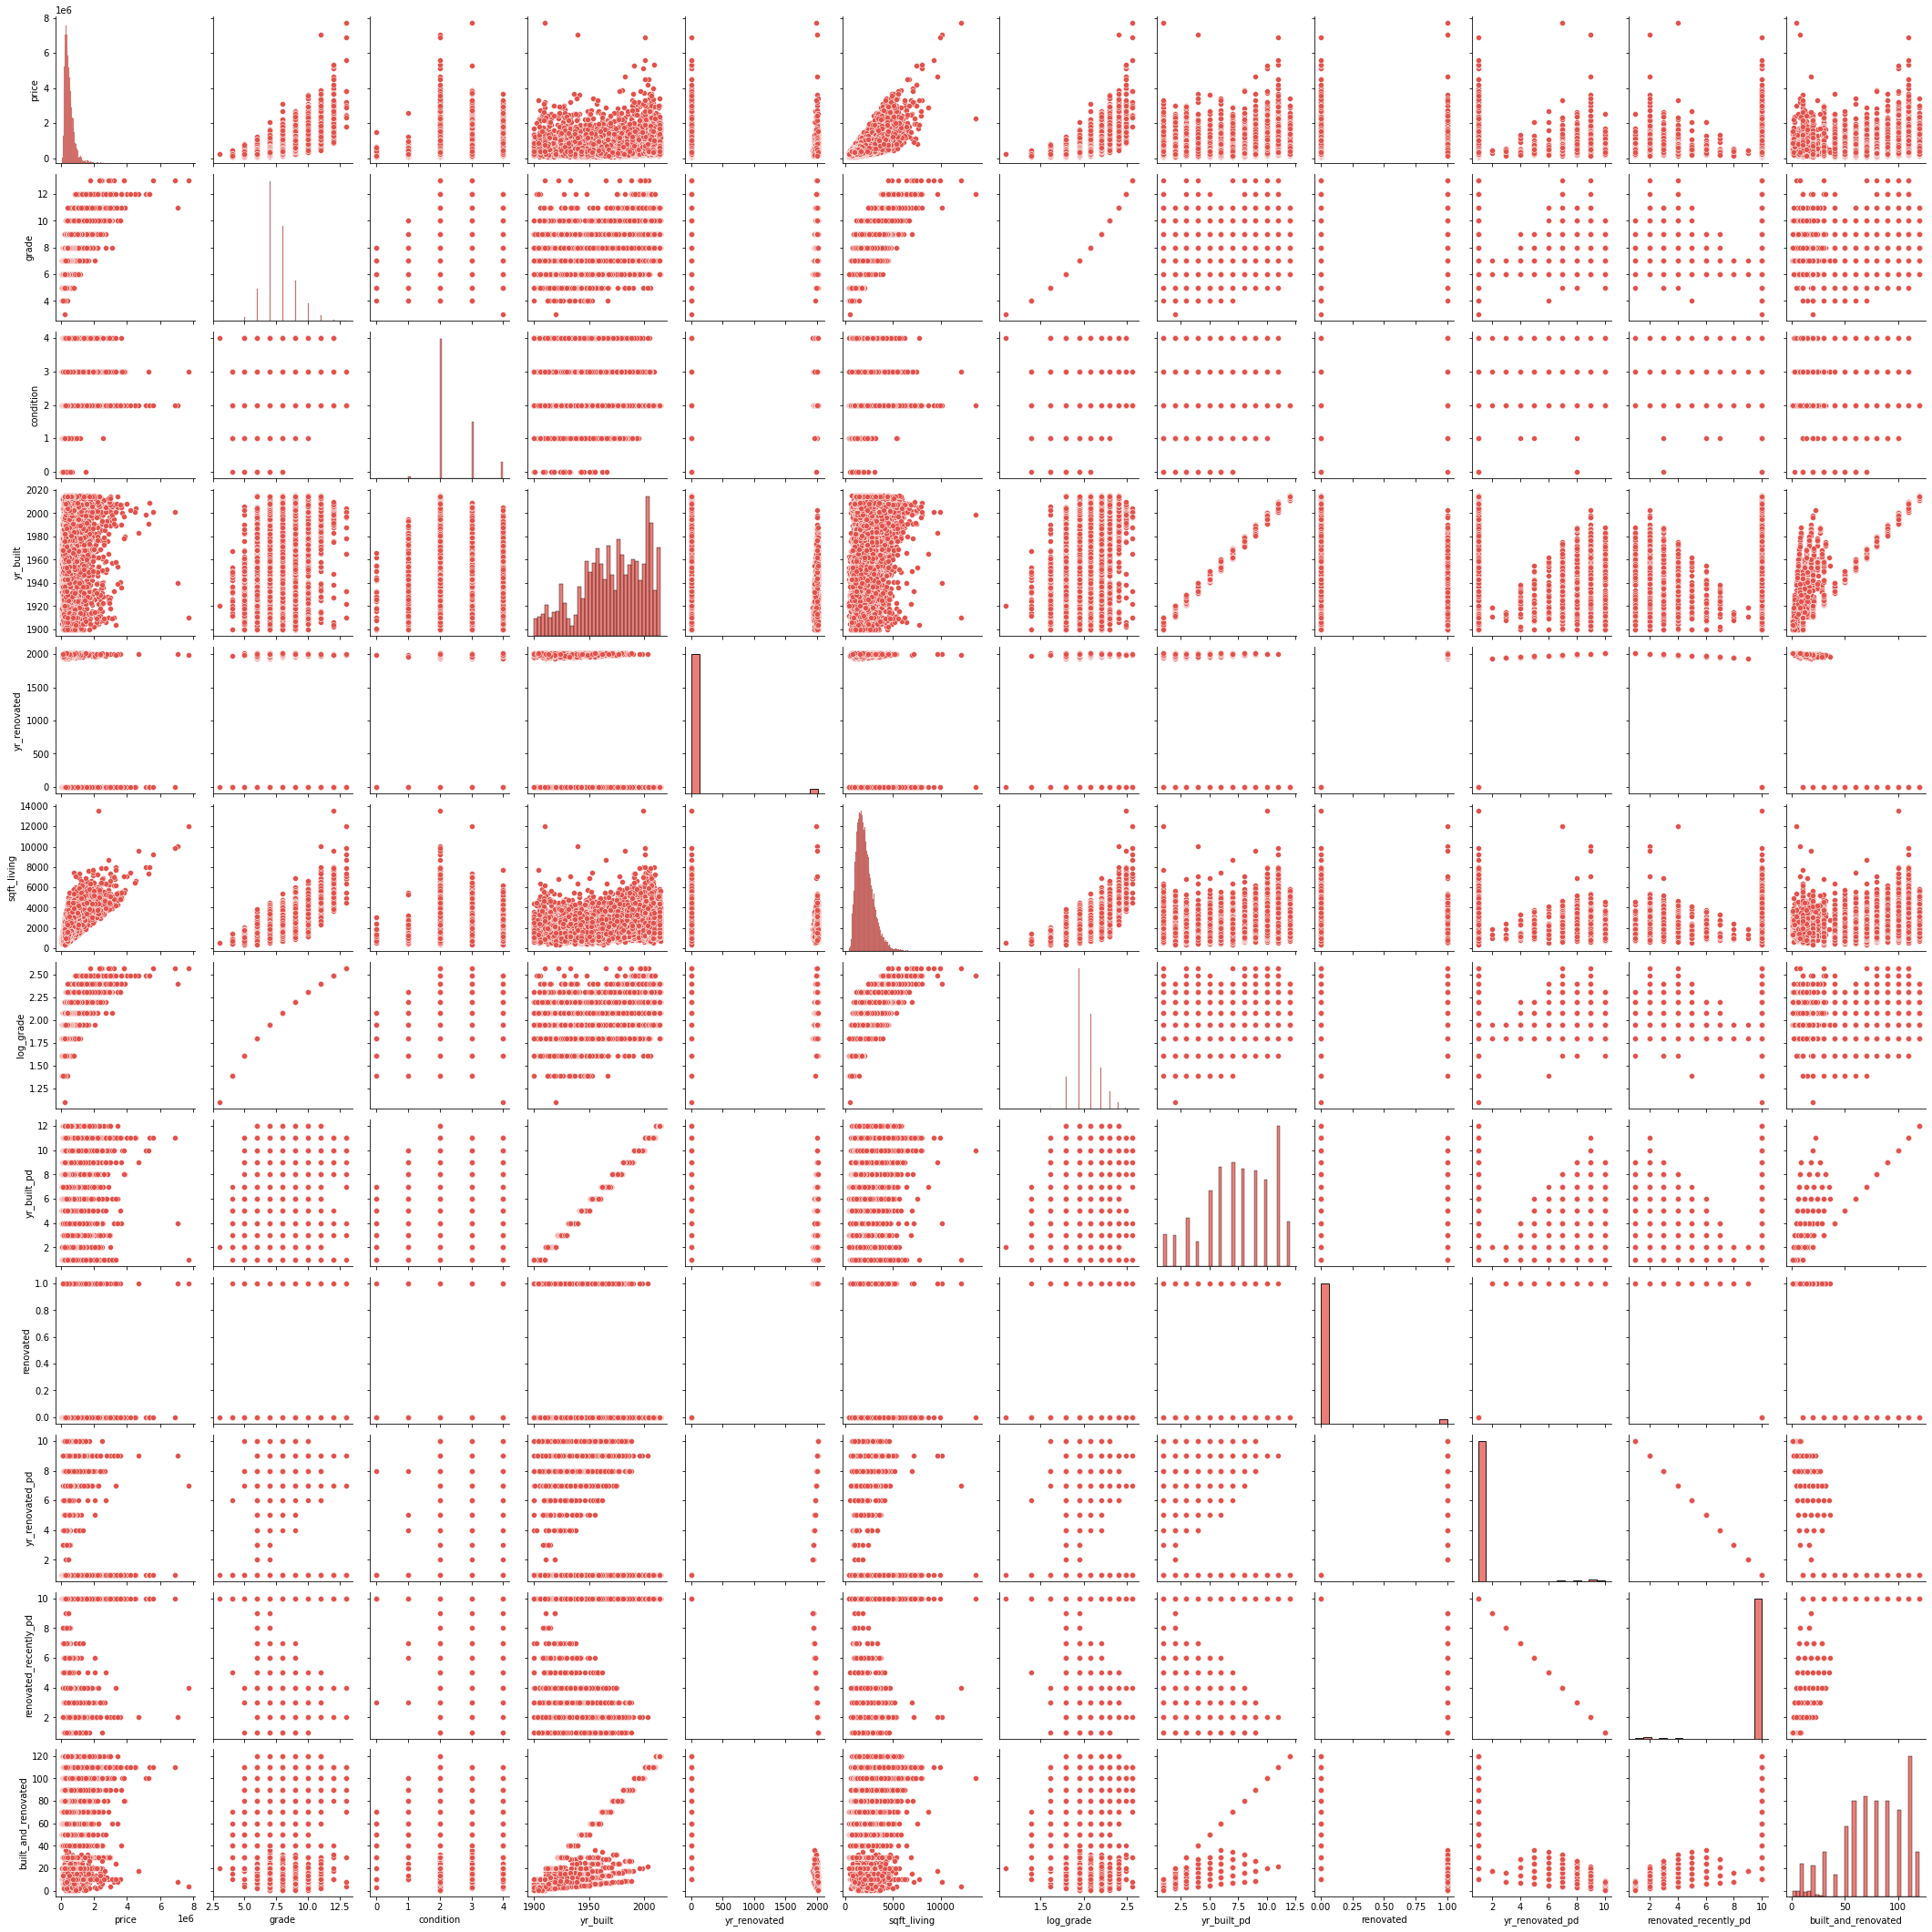

In [73]:
# sns.pairplot(df_condition)

# OUTPUT! CSV AND CALL IT A DAY!

## select features

In [311]:
df.columns,df.shape

(Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 (21597, 19))

In [312]:
col_selector = ['price','sqft_living','sqft_above','bedrooms','bathrooms','grade','condition','view','waterfront']
df_sel = df[col_selector]

In [313]:
df_condition.columns, df_condition.shape

(Index(['price', 'grade', 'condition', 'yr_built', 'yr_renovated',
        'sqft_living', 'log_grade', 'yr_built_pd', 'renovated',
        'yr_renovated_pd', 'renovated_recently_pd', 'built_and_renovated'],
       dtype='object'),
 (21597, 12))

In [314]:
col_selector = ['yr_built','yr_renovated','yr_built_pd','renovated','yr_renovated_pd','built_and_renovated']
df_condition_sel = df_condition[col_selector]

In [315]:
df_ls.columns, df_ls.shape

(Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'sqft_above', 'sqft_basement', 'BR/BTH', 'FAR', 'yard',
        'Living_Space_VS_Bedroom', 'lot_per_floor', 'living_per_floor',
        'living_per_lot'],
       dtype='object'),
 (21597, 15))

In [316]:
col_selector = ['BR/BTH', 'FAR','Living_Space_VS_Bedroom', 'lot_per_floor', 'living_per_floor','living_per_lot']
df_ls_sel = df_ls[col_selector]

In [317]:
df_loc.columns, df_loc.shape

(Index(['price', 'zipcode', 'sqft_living', 'avg_price_zipcode',
        'avg_sqft_living', 'pop_zip'],
       dtype='object'),
 (21597, 6))

In [318]:
col_selector = ['avg_price_zipcode','avg_sqft_living', 'pop_zip']
df_loc_sel = df_loc[col_selector]

## combine

In [319]:
df_output = pd.merge(df_sel,df_ls_sel, left_index=True, right_index=True)

In [320]:
df_output = pd.merge(df_output, df_condition_sel, left_index=True, right_index=True)

In [321]:
df_output = pd.merge(df_output, df_loc_sel, left_index=True, right_index=True)

In [322]:
df_output.columns

Index(['price', 'sqft_living', 'sqft_above', 'bedrooms', 'bathrooms', 'grade',
       'condition', 'view', 'waterfront', 'BR/BTH', 'FAR',
       'Living_Space_VS_Bedroom', 'lot_per_floor', 'living_per_floor',
       'living_per_lot', 'yr_built', 'yr_renovated', 'yr_built_pd',
       'renovated', 'yr_renovated_pd', 'built_and_renovated',
       'avg_price_zipcode', 'avg_sqft_living', 'pop_zip'],
      dtype='object')

In [323]:
# df_output.to_csv(r'C:\Users\qwswe\Documents\Flatiron\DS_P2_King-County-House-Sales-Predict\Data_Han\df_for_model_2.csv', index = False)

MY REFERENCE CODE

col_selector = ['price','zipcode','sqft_living']
df_loc = df[col_selector]
df_loc.head()



df_loc = pd.get_dummies(df_loc,columns=['zipcode'],drop_first=True)
df_loc.head(3)




# check in model with zipcode
y = df_loc['price']
X = df_loc.drop(columns=['price'])

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print('R2 with zipcode: ', results.rsquared)



df_loc = df_loc.join(df[['waterfront','view']],on=df_loc.index)


fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.scatterplot(hue = 'floors', y = 'price', x = 'sqft_living', data = df_ls,alpha=0.5, ax=axes[0])
sns.scatterplot(x = 'floors', y = 'price', data = df_ls,alpha=0.5, ax=axes[1])
ax.ticklabel_format(style='plain');